In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def noise(data):
    noise = np.random.normal(0, np.abs(0.01 * data), size=data.shape)#noise=0; 0.01; 0.005; 0.0025
    noisy_data = data + noise
    return noisy_data

C:\Users\Мария\AppData\Local\Temp\ipykernel_6208\3791058046.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return -quad(integrand1, -np.inf, np.inf, args=(x, t))[0] / quad(integrand2, -np.inf, np.inf, args=(x, t))[
C:\Users\Мария\AppData\Local\Temp\ipykernel_6208\3791058046.py:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -quad(integrand1, -np.inf, np.inf, args=(x, t))[0] / quad(integrand2, -np.inf, np.inf, args=(x, t))[


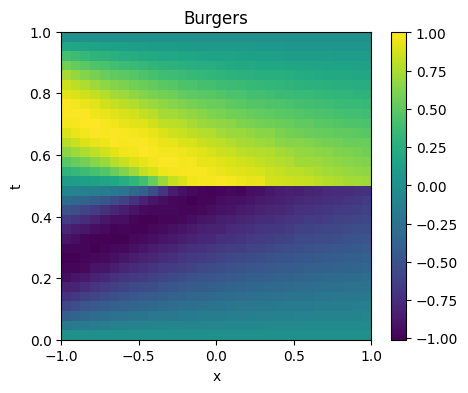

In [25]:
from scipy.integrate import quad
import torch

x = torch.from_numpy(np.linspace(-1, 1, 32))
t = torch.from_numpy(np.linspace(0, 1, 32))
grid = torch.cartesian_prod(x, t).float()

def exact(grid):
    mu = 0.01 / np.pi

    def f(y):
        return np.exp(-np.cos(np.pi * y) / (2 * np.pi * mu))

    def integrand1(m, x, t):
        return np.sin(np.pi * (x - m)) * f(x - m) * np.exp(-m ** 2 / (4 * mu * t))

    def integrand2(m, x, t):
        return f(x - m) * np.exp(-m ** 2 / (4 * mu * t))

    def u(x, t):
        if t == 0:
            return -np.sin(np.pi * x)
        else:
            return -quad(integrand1, -np.inf, np.inf, args=(x, t))[0] / quad(integrand2, -np.inf, np.inf, args=(x, t))[
                0]

    solution = []
    for point in grid:
        solution.append(u(point[0].item(), point[1].item()))

    return torch.tensor(solution).detach().numpy()

u = noise(exact(grid).reshape(32, 32))


plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[torch.min(x), torch.max(x),torch.min(t), torch.max(t)], cmap='viridis')
plt.colorbar()
plt.title('Burgers')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


(32, 32)


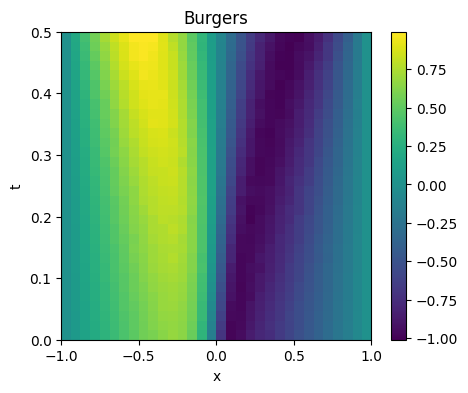

In [26]:
L = 1#длина области
T = 0.5#время
N = 31#точки по пространству
M = 31#точки по времени
nu = 0.05#кинематическая вязкость

#шаги
dx = (1 - (-1)) / (N + 1)
dt = (0.5 - 0) / (M + 1)

#сетка
x = np.linspace(-1, L, N+1)
u = np.zeros((M+1, N+1))# t - 0, x - 1

#начальное условие
u[0, :] = -np.sin(np.pi * x)

#гран. условия
for n in range(1, M+1):
    #по неявной схеме
    A = np.zeros((N-1, N-1))
    b = np.zeros(N-1)
    #матрица A и вектор b
    for i in range(1, N):
        A[i-1, i-1] = 1 + 2 * nu * dt / (dx**2) 
        if i > 1:
            A[i-1, i-2] = -nu * dt / (dx**2) 
        if i < N-1:
            A[i-1, i] = -nu * dt / (dx**2)
        #конвективный член (явная схема)
        b[i-1] = u[n-1, i] + dt * (-u[n-1, i] * (u[n-1, i] - u[n-1, i-1]) / dx)

    u[n, 1:N] = np.linalg.solve(A, b)

    #граничные условия
    u[n, 0] = 0  # Левая граница
    u[n, N] = 0  # Правая граница

u = noise(u)
print(u.shape)
plt.figure(figsize=(5, 4))
plt.imshow(u, aspect='auto', extent=[-1, L, 0, T], cmap='viridis')
plt.colorbar()
plt.title('Burgers')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

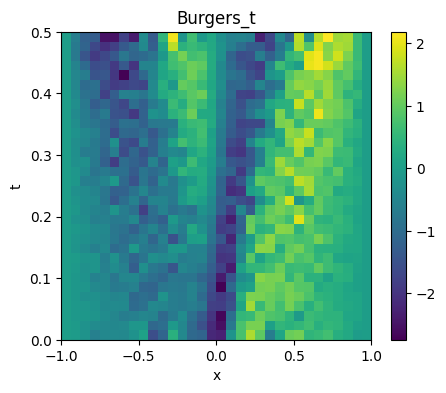

In [27]:
x = np.linspace(-1, 1, 32)
t =np.linspace(0, 0.5, 32)
u1 = np.gradient(u, dt, axis=0) # по t

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('Burgers_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


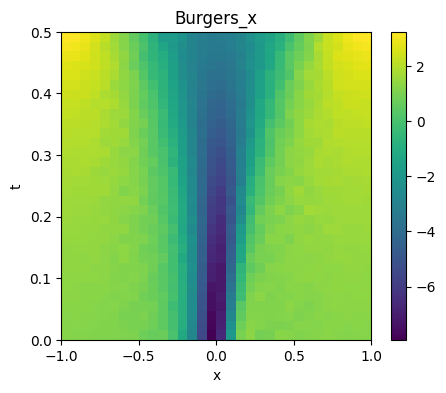

In [28]:
u1 = np.gradient(u, dx, axis=1)# по x


plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('Burgers_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


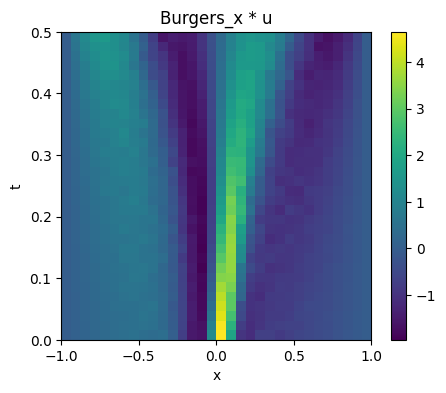

In [29]:
u1 = u * np.gradient(u, dx, axis=1)# по x * u


plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('Burgers_x * u')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


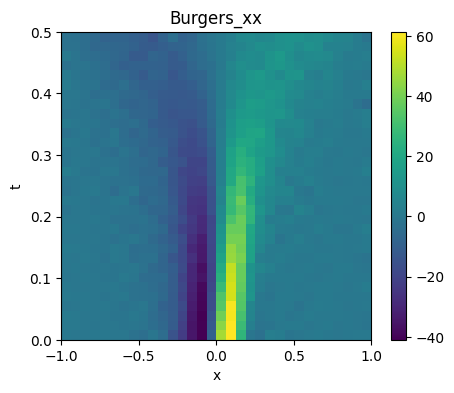

In [30]:
u1 = (np.gradient((np.gradient(u, dx, axis=1, edge_order=2)), dx, axis=1, edge_order=2))#вторая по х


plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('Burgers_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


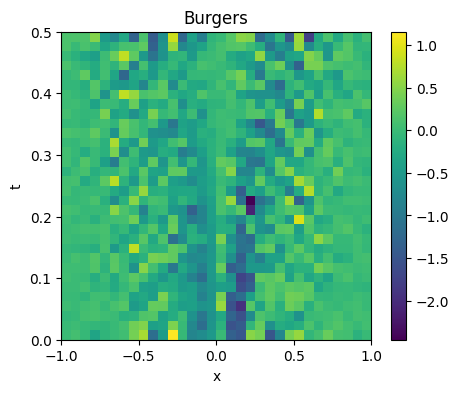

In [31]:
#проверка
u1 = (u  * (np.gradient(u, dx, axis=1, edge_order=2) )) + (np.gradient(u, dt, axis=0) ) - (nu * (np.gradient((np.gradient(u, dx, axis=1, edge_order=2)), dx, axis=1, edge_order=2)))

plt.figure(figsize=(5, 4))
plt.imshow(u1, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('Burgers')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [32]:
np.save('data_Burgers_noise0.01.npy', u)